In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




import gc #Trash Collection
import re #Regular Expression
import joblib #Export Pre-Processor/Model 

# import seaborn for more plotting options(built on top of matplotlib)

import seaborn as sns

(307511, 122)
(48744, 121)


C:\Users\sambo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    282686
1     24825
Name: TARGET, dtype: int64

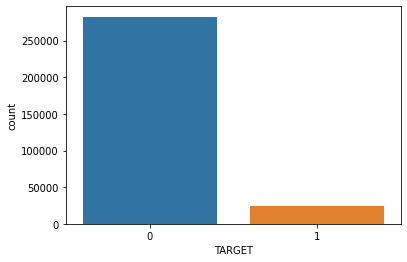

In [2]:
# import dataset application_train.csv an application_test.csv
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

#describe df_train and  df_test

df_train.describe()
df_test.describe()
print(df_train.shape)
print(df_test.shape)

#How the target labels are spread
sns.countplot(df_train.TARGET)
df_train['TARGET'].value_counts()

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Drop rows with NaN values
df_train = df_train.dropna()

# one-hot encoding of categorical variables
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)



Accuracy: 93.90%
ROC AUC Score: 65.12%


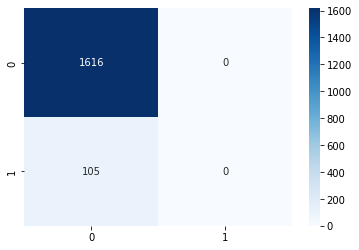

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('TARGET', axis=1), df_train['TARGET'], test_size=0.2)

# Create the random forest classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)


# Evaluate the classifier on the test data
accuracy = clf.score(X_test, y_test)


# accuracy
print('Accuracy: {:.2f}%'.format(accuracy * 100))

# roc_auc_score
print('ROC AUC Score: {:.2f}%'.format(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100))

#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

#dataviz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create a confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

# Create a heatmap

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# create confusion matrix.png 
plt.savefig('confusion_matrix.png')




In [16]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(df_train.drop('TARGET', axis=1))

# Transform the test data using the imputer
df_test_imputed = imputer.transform(df_test)

# Make predictions on the test data
y_pred = clf.predict_proba(df_test_imputed)[:, 1]

# Create a new dataframe with the ID and the predicted values
submission_random_forest = df_test[['SK_ID_CURR']]
submission_random_forest['TARGET'] = y_pred

# Save the dataframe to a csv file
submission_random_forest.to_csv("random_forest.csv", index=False)



C:\Users\sambo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- FLAG_OWN_CAR_N
- NAME_INCOME_TYPE_Businessman
- NAME_INCOME_TYPE_Pensioner
- NAME_INCOME_TYPE_Student
- NAME_INCOME_TYPE_Unemployed
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 242 features, but SimpleImputer is expecting 234 features as input.

In [8]:
# mlflow
import mlflow
import mlflow.sklearn


# Create an experiment
mlflow.set_experiment('Home Credit Default Risk2')

# Start a run
with mlflow.start_run():
        
        # Log the model
        mlflow.sklearn.log_model(clf, 'model')
        
        # Log the accuracy
        mlflow.log_metric('accuracy', accuracy)
        
        # Log the roc_auc_score
        mlflow.log_metric('roc_auc_score', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
        
        # Log the confusion matrix
        mlflow.log_artifact('confusion_matrix.png')
        
        # Log parameters
        
        mlflow.log_param('n_estimators', clf.n_estimators)
        mlflow.log_param('max_depth', clf.max_depth)
        mlflow.log_param('min_samples_split', clf.min_samples_split)
        mlflow.log_param('min_samples_leaf', clf.min_samples_leaf)
        mlflow.log_param('max_features', clf.max_features)
        mlflow.log_param('max_leaf_nodes', clf.max_leaf_nodes)
        mlflow.log_param('min_impurity_decrease', clf.min_impurity_decrease) 
        
        



In [10]:
import mlflow.sklearn

# save the model and its associated metadata
mlflow.sklearn.save_model(clf, 'model')